# **Group 3 Project: store_data.csv**

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclude">Conclusion</a></li>
</ul>

## Introduction

`Store_data.csv` is a dataset that stores the daily sales of five stores, namely storeA, storeB, storeC, and StoreD. This dataset is collected for four years from 2014 to 2018. Some questions that can be explored from this dataset are:
1. What is the total sales for the last month?
2. What is the average sales across all stores?
3. What is the sales on March 13, 2016?
4. When is worst week of Store C?
5. How much are the total sales from the most recent 3 months?

## Data Wrangling

### 1. Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### 2. Gathering the data

In [2]:
df = pd.read_csv('store_data.csv')
df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


### 3. Assess for possible problems

In [3]:
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
week      200 non-null object
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


> From this step, several insights regarding the dataset can be obtained. (1) It has 200 rows and 6 columns, meaning that, for each store, daily sales are recorder for 200 days, (2) 'Week' column shows the date when the sales are recorded and the data type is 'object', and (3) Other columns aside of 'week' show the daily sales recorded in each store and the data type is 'integer.'

> Another important insight acquired from this step is that all total observations for each column are 200 observations. This implies that there is no missing values in the dataset. There is also no duplicate value in every columns.

> There is one potential problem, though, in the 'week' column, the data format is 'object.' In order to conduct time-series analysis, it will be more convenient to tell Pandas that this column is a time indicator.

### 4. Cleaning the dataset

In [5]:
# Convert 'week' colum to 'datetime'-type data.
df_copy = df.copy()

In [6]:
df_copy['week'] = pd.to_datetime(df_copy['week'], format='%Y-%m-%d')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
week      200 non-null datetime64[ns]
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 9.5 KB


> Now, the 'week' column is in 'datetime' format.

## Data Exploring

In [8]:
df_index = df_copy.set_index('week')
df_index.head()

,storeA,storeB,storeC,storeD,storeE
week,,,,,
2014-05-04,2643,8257,3893,6231,1294
2014-05-11,6444,5736,5634,7092,2907
2014-05-18,9646,2552,4253,5447,4736
2014-05-25,5960,10740,8264,6063,949
2014-06-01,7412,7374,3208,3985,3023


In [23]:
df_copy['month'] = pd.to_datetime(df_copy['week']).dt.to_period('M')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
week      200 non-null datetime64[ns]
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
month     200 non-null period[M]
dtypes: datetime64[ns](1), int64(5), period[M](1)
memory usage: 11.1 KB


In [24]:
df_copy.head()

,week,storeA,storeB,storeC,storeD,storeE,month
0,2014-05-04,2643,8257,3893,6231,1294,2014-05
1,2014-05-11,6444,5736,5634,7092,2907,2014-05
2,2014-05-18,9646,2552,4253,5447,4736,2014-05
3,2014-05-25,5960,10740,8264,6063,949,2014-05
4,2014-06-01,7412,7374,3208,3985,3023,2014-06


In [15]:
des_stats = df_index.describe()
des_stats

,storeA,storeB,storeC,storeD,storeE
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5865.480000,6756.710000,4942.105000,5431.405000,2580.025000
std,2958.230318,3601.339489,1325.407768,1183.111323,1725.651381
min,137.000000,14.000000,927.000000,2276.000000,39.000000
25%,3812.250000,3884.500000,4053.500000,4717.000000,1235.000000
50%,5713.500000,6771.000000,4962.500000,5382.000000,2522.000000
75%,7662.250000,9350.500000,5801.750000,6243.750000,3574.250000
max,14403.000000,15841.000000,8293.000000,8190.000000,7553.000000


In [25]:
monthly_sales = df_copy.groupby('month').sum()
monthly_sales.tail()

,storeA,storeB,storeC,storeD,storeE
month,,,,,
2017-10,32299,44731,20535,27545,9435
2017-11,29748,27601,21520,25219,6914
2017-12,40688,29151,30198,28422,8509
2018-01,21776,25648,19893,23985,11038
2018-02,25127,24595,16447,22783,7787


In [28]:
monthly_sales.describe()

,storeA,storeB,storeC,storeD,storeE
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,25502.086957,29377.000000,21487.413043,23614.804348,11217.500000
std,7496.503407,10271.212868,3874.863809,3320.193098,3525.337706
min,8626.000000,12353.000000,12695.000000,17940.000000,5030.000000
25%,19998.250000,23088.750000,19275.000000,21470.000000,8455.750000
50%,24438.000000,27680.500000,20891.500000,23098.500000,10931.000000
75%,31761.000000,33503.500000,23683.750000,25604.500000,13036.750000
max,41549.000000,56675.000000,30601.000000,30235.000000,19846.000000


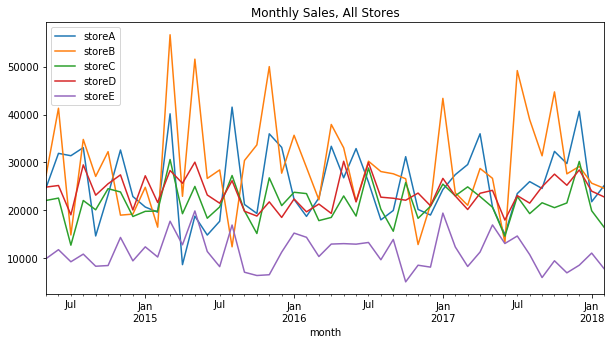

In [29]:
monthly_sales.plot(
    kind='line', 
    figsize=(10,5),
    title="Monthly Sales, All Stores"
    );